In [1]:
'''
Analysis based in 'Activity 2: Exploring Dealership Sales Data' from
the book 'SQL for Data Analysis' by 'Upom Malik, Matt Goldwasser and
Benjamin Johnston'

First Published: August 2019
Production Reference: 1220819
ISBN: 978-1-78980-735-6
Published by Packt Publishing Ltd.
Livery Place, 35 Livery Street
Birmingham B3 2PB, UK
'''

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as sts

In [2]:
dsd = pd.read_csv('dealerships.csv')

In [3]:
# Viewing the dataset structure
dsd.head()

,Location,Net Annual Sales,Number of Female Employees
0,"Millburn, NJ",150803012.0,27
1,"Los Angeles, CA",110872084.0,17
2,"Houston, TX",183945873.0,22
3,"Miami, FL",156355396.0,18
4,"San Mateo, CA",143108603.0,17


In [4]:
dsd.describe().T

,count,mean,std,min,25%,50%,75%,max
Net Annual Sales,20.0,1.716038e+08,5.015229e+07,95512810.7,1.450191e+08,170130716.5,1.823518e+08,350520724.0
Number of Female Employees,20.0,2.580000e+01,6.143889e+00,17.0,1.975000e+01,27.0,3.200000e+01,35.0


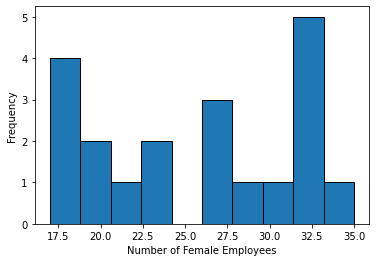

In [5]:
# # A frequency distribution of the number of female employees at a dealership.
plt.hist(dsd.iloc[:,2], edgecolor = 'black')
plt.xlabel('Number of Female Employees')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Average, median and Standard Deviation from annual sales for a dealership.
print('Mean: {:.2f}'.format(sts.mean(dsd.iloc[:, 1])))
print('Median: {:.2f}'.format(sts.median(dsd.iloc[:, 1])))
print('Standard Deviation: {:.2f}'.format(sts.stdev(dsd.iloc[:,1])))


Mean: 171603750.13
Median: 170130716.50
Standard Deviation: 50152290.42


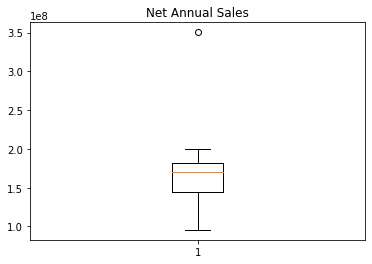

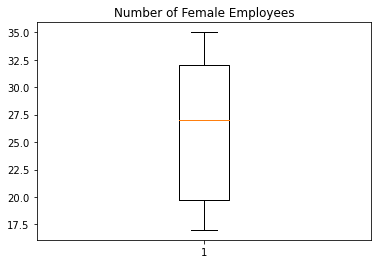

In [7]:
# Looking for Outliers using Boxplot
plt.figure(1)
plt.title('Net Annual Sales')
plt.boxplot(dsd.iloc[:,1])
plt.show()

plt.figure(2)
plt.title('Number of Female Employees')
plt.boxplot(dsd.iloc[:,2])
plt.show()

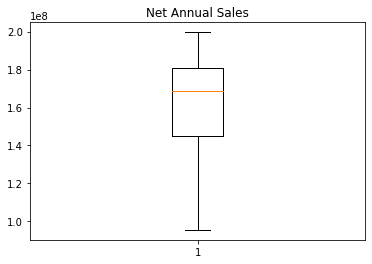

In [8]:
# Outliter detected in Net Annual Sales

# Removing the outlier data point using IQR
# IQR score
Q1 = dsd.iloc[:,1].quantile(0.25)
Q3 = dsd.iloc[:,1].quantile(0.75)
IQR = Q3 - Q1

filter_arr = np.where(np.logical_or(dsd.iloc[:,1] < (Q1 - 1.5 * IQR), dsd.iloc[:,1] > Q3 + 1.5 * IQR))

dsd.drop(filter_arr[0], inplace = True)

plt.figure(1)
plt.title('Net Annual Sales')
plt.boxplot(dsd.iloc[:,1])
plt.show()

Correlation is: 0.55


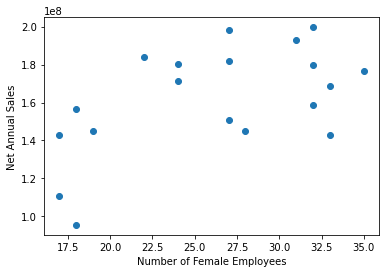

In [9]:
# Calculate the correlation coefficient of annual sales to female employees

x = dsd.iloc[:,2]
y = dsd.iloc[:,1]
plt.xlabel('Number of Female Employees')
plt.ylabel('Net Annual Sales')
plt.scatter(x, y)

print('Correlation is: {:.2f}'.format(np.corrcoef(x,y)[0,1])) # com o outlier